In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import statsmodels.api as sm


In [31]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [19]:
def calculate_outlier_counts(df):
   
    outlier_counts = {}
    
    for col in df.columns:
        q1, q2, q3 = df[col].quantile(q=[0.25, 0.5, 0.75])
        range_iqr = q3 - q1
        threshold_min = q1 - 1.5 * range_iqr
        threshold_max = q3 + 1.5 * range_iqr
        
        below_threshold = (df[col] < threshold_min).sum()
        above_threshold = (df[col] > threshold_max).sum()
        
        outlier_counts[col] = {
            'below_threshold': below_threshold,
            'above_threshold': above_threshold
        }
    
    return outlier_counts

def print_outlier_counts(report):
 
    print("Outlier Counts Report:")
    for col, counts in report.items():
        print(f"Column: {col}")
        print(f"  Below Threshold: {counts['below_threshold']}")
        print(f"  Above Threshold: {counts['above_threshold']}")
        print(f"  Total Outliers: {counts['below_threshold'] + counts['above_threshold']}")
        print("------------------------")



outlier_counts = calculate_outlier_counts(df)
print_outlier_counts(outlier_counts)

Outlier Counts Report:
Column: Citric Acid
  Below Threshold: 0
  Above Threshold: 1
  Total Outliers: 1
------------------------
Column: Sugar Content
  Below Threshold: 0
  Above Threshold: 0
  Total Outliers: 0
------------------------
Column: pH Level
  Below Threshold: 0
  Above Threshold: 1
  Total Outliers: 1
------------------------


In [ ]:
def calculate_outliers(df):
    
    outliers_report = {}
    
    for col in df.columns:
        q1, q2, q3 = df[col].quantile(q=[0.25, 0.5, 0.75])
        range_iqr = q3 - q1
        threshold_min = q1 - 1.5 * range_iqr
        threshold_max = q3 + 1.5 * range_iqr
        
        outliers_below = df[df[col] < threshold_min][col]
        outliers_above = df[df[col] > threshold_max][col]
        
        outliers_report[col] = {
            'threshold_min': threshold_min,
            'threshold_max': threshold_max,
            'outliers_below': outliers_below.values.tolist(),
            'outliers_above': outliers_above.values.tolist()
        }
    
    return outliers_report

def print_outliers_report(report):
    for col, info in report.items():
        print(f"Column: {col}")
        print(f"Threshold Min: {info['threshold_min']}")
        print(f"Threshold Max: {info['threshold_max']}")
        print("Outliers Below Threshold:")
        print(info['outliers_below'])
        print("Outliers Above Threshold:")
        print(info['outliers_above'])
        print("------------------------")


outliers_report = calculate_outliers(df)
print_outliers_report(outliers_report)


Column: Citric Acid
Threshold Min: 0.4499999999999995
Threshold Max: 3.4500000000000006
Outliers Below Threshold:
[]
Outliers Above Threshold:
[100.0]
------------------------
Column: Sugar Content
Threshold Min: -15.050000000000004
Threshold Max: 86.15
Outliers Below Threshold:
[]
Outliers Above Threshold:
[]
------------------------
Column: pH Level
Threshold Min: 2.8999999999999995
Threshold Max: 4.900000000000001
Outliers Below Threshold:
[]
Outliers Above Threshold:
[10.0]
------------------------


<Axes: xlabel='Citric Acid'>

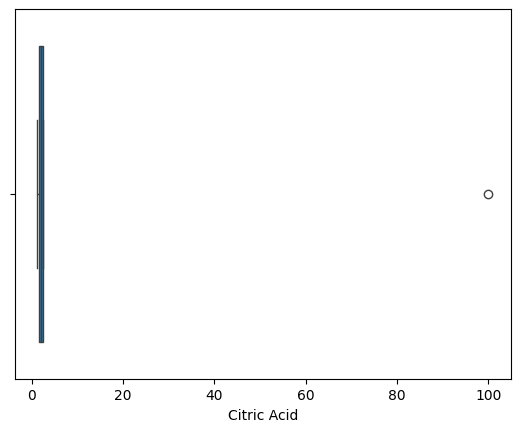

In [21]:
sns.boxplot(x = df["Citric Acid"])

<Axes: xlabel='pH Level'>

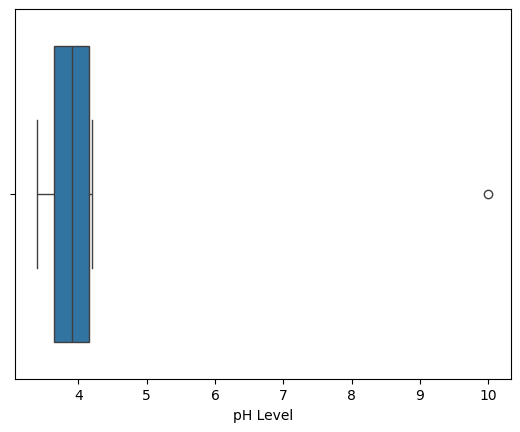

In [22]:
sns.boxplot(x = df["pH Level"])

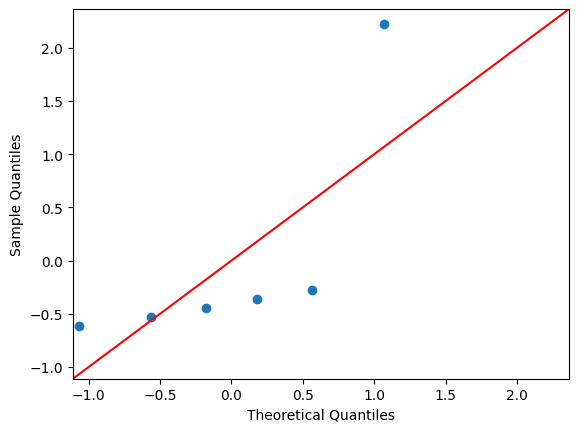

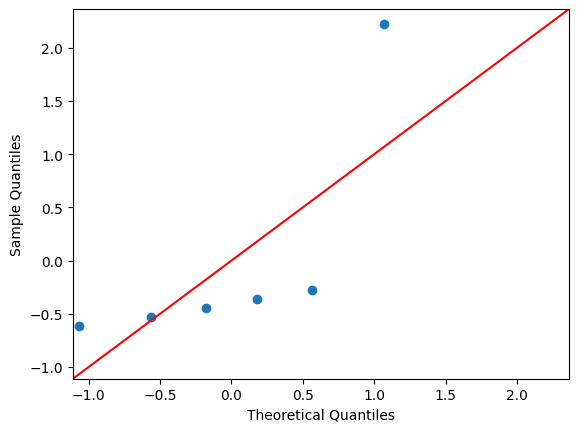

In [28]:
sm.qqplot(df["pH Level"], fit = True, line = '45')

Citric Acid
Sugar Content
pH Level


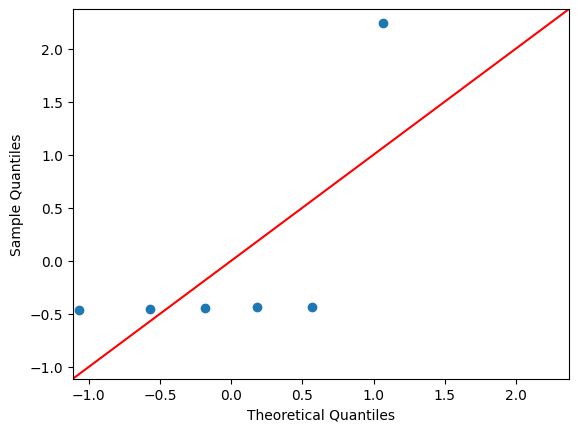

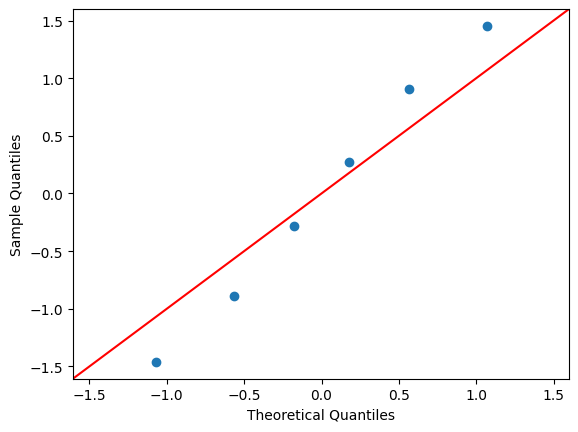

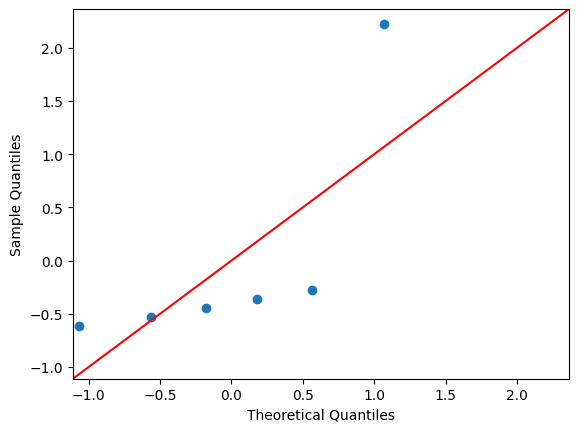

In [29]:
for column in df.columns:
    print(column)
    sm.qqplot(df[column], line='45', fit = True)


In [32]:
df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [34]:
df['quality'].value_counts(normalize=True)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

In [35]:
csv_path = "/Users/notagain/.cache/kagglehub/datasets/tejashvi14/travel-insurance-prediction-data/versions/4/TravelInsurancePrediction.csv"
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
